In [523]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


conn_params = {
    "host": "localhost",
    "database": "language_analysis",
    "user": "postgres",
    "password": "123124125",
    "port": 5432  
}

def connect_to_db(conn_params):

    try:
        conn = psycopg2.connect(**conn_params)
        cur = conn.cursor()
        return conn, cur
    except psycopg2.Error as e:
        print(f"Ошибка при подключении к базе данных: {e}")
        return None, None

def execute_query(cur, query):

    try:
        cur.execute(query)
        data = cur.fetchall()
        columns = [desc[0] for desc in cur.description]
        return pd.DataFrame(data, columns=columns)
    except psycopg2.Error as e:
        print(f"Ошибка при выполнении запроса: {e}")
        return None

def close_connection(conn, cur):

    if cur:
        cur.close()
    if conn:
        conn.close()


<>:6: SyntaxWarning: invalid escape sequence '\+'
<>:6: SyntaxWarning: invalid escape sequence '\+'
C:\Users\Данила\AppData\Local\Temp\ipykernel_18536\3058323027.py:6: SyntaxWarning: invalid escape sequence '\+'
  query = """


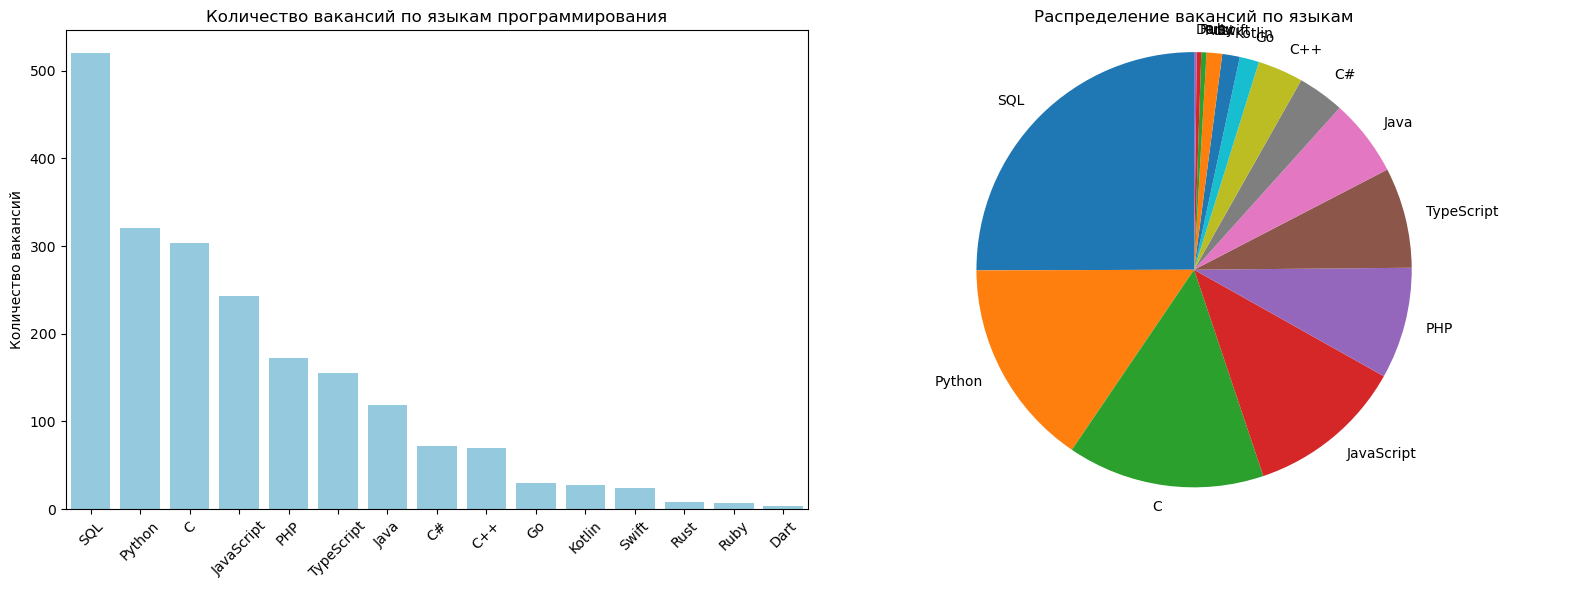

In [525]:
def get_data(conn_params):
    conn, cur = connect_to_db(conn_params)
    if conn is None:
        return None

    query = """
        SELECT l.language_name, COUNT(v.id) AS vacancy_count
FROM languages l
JOIN vacancies v ON (v.vac_name ~* CASE WHEN l.language_name = 'C++' THEN 'C\+\+' WHEN l.language_name = 'C#' THEN 'C\#' ELSE format('(^|\y)%s($|\y)', regexp_replace(l.language_name, '([$.*+?()[\]{}\|\^])', '\\\\\1', 'g')) END)
    OR (v.snippet_req ~* CASE WHEN l.language_name = 'C++' THEN 'C\+\+' WHEN l.language_name = 'C#' THEN 'C\#' ELSE format('(^|\y)%s($|\y)', regexp_replace(l.language_name, '([$.*+?()[\]{}\|\^])', '\\\\\1', 'g')) END)
GROUP BY l.language_name
ORDER BY vacancy_count DESC;
    """

    df = execute_query(cur, query)
    close_connection(conn, cur)
    return df

df = get_data(conn_params)
if df is not None:
      #print(df)
      fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6)) 

      # Barplot
      sns.barplot(x='language_name', y='vacancy_count', data=df, color='skyblue', ax=ax1)
      ax1.set_xlabel('')
      ax1.set_ylabel('Количество вакансий')
      ax1.set_title('Количество вакансий по языкам программирования')
      ax1.tick_params(axis='x', rotation=45)

      # Pie chart
      ax2.pie(df['vacancy_count'], labels=df['language_name'], startangle=90)
      ax2.axis('equal') 
      ax2.set_title('Распределение вакансий по языкам')

      plt.tight_layout()
      plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\+'
<>:6: SyntaxWarning: invalid escape sequence '\+'
C:\Users\Данила\AppData\Local\Temp\ipykernel_18536\2010496559.py:6: SyntaxWarning: invalid escape sequence '\+'
  query = """


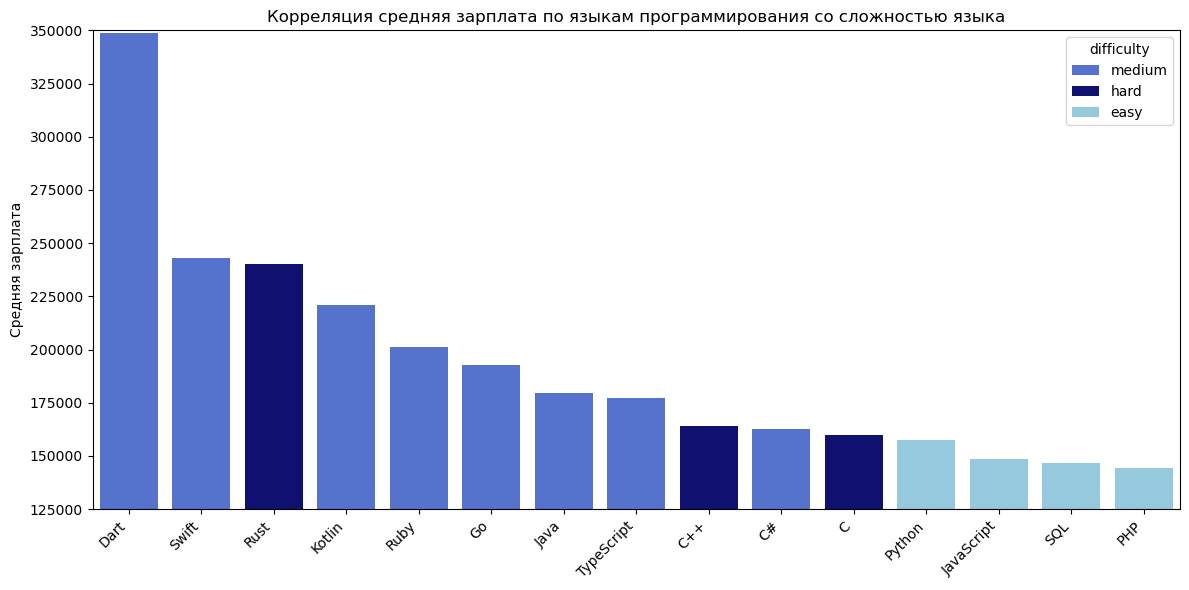

In [527]:
def get_data(conn_params):
    conn, cur = connect_to_db(conn_params)
    if conn is None:
        return None

    query = """
        WITH VacancyAverages AS (SELECT v.id, l.language_name, l.difficulty, (COALESCE(v.salary_from, v.salary_to) + COALESCE(v.salary_to, v.salary_from)) / 2 AS avg_every_salary
FROM vacancies v
JOIN languages L ON (v.vac_name ~* CASE WHEN l.language_name = 'C++' THEN 'C\+\+' WHEN l.language_name = 'C#' THEN 'C\#' ELSE format('(^|\y)%s($|\y)', regexp_replace(l.language_name, '([$.*+?()[\]{}\|\^])', '\\\\\1', 'g')) END)
    OR (v.snippet_req ~* CASE WHEN l.language_name = 'C++' THEN 'C\+\+' WHEN l.language_name = 'C#' THEN 'C\#' ELSE format('(^|\y)%s($|\y)', regexp_replace(l.language_name, '([$.*+?()[\]{}\|\^])', '\\\\\1', 'g')) END)
WHERE v.currency = 'RUR')

SELECT language_name, difficulty, ROUND(AVG(avg_every_salary)) AS salary_avg
FROM VacancyAverages
GROUP BY language_name, difficulty
ORDER BY salary_avg DESC, difficulty;
    """

    df = execute_query(cur, query)
    close_connection(conn, cur)
    return df

df = get_data(conn_params)
if df is not None:
    #print(df)
    plt.figure(figsize=(12, 6))  # Увеличиваем размер графика
    palette = {
           "easy": "skyblue",  
           "medium": "royalblue",
           "hard": "navy"
        }
    sns.barplot(x='language_name', y='salary_avg', hue='difficulty', data=df, color='skyblue', palette = palette)
    plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи на оси X
    plt.xlabel('')
    plt.ylabel('Средняя зарплата')
    plt.title('Корреляция средняя зарплата по языкам программирования со сложностью языка')
    plt.ylim(125000, 350000) 
    plt.tight_layout()  # Убираем обрезку подписей
    plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\+'
<>:6: SyntaxWarning: invalid escape sequence '\+'
C:\Users\Данила\AppData\Local\Temp\ipykernel_18536\1638588094.py:6: SyntaxWarning: invalid escape sequence '\+'
  query = """


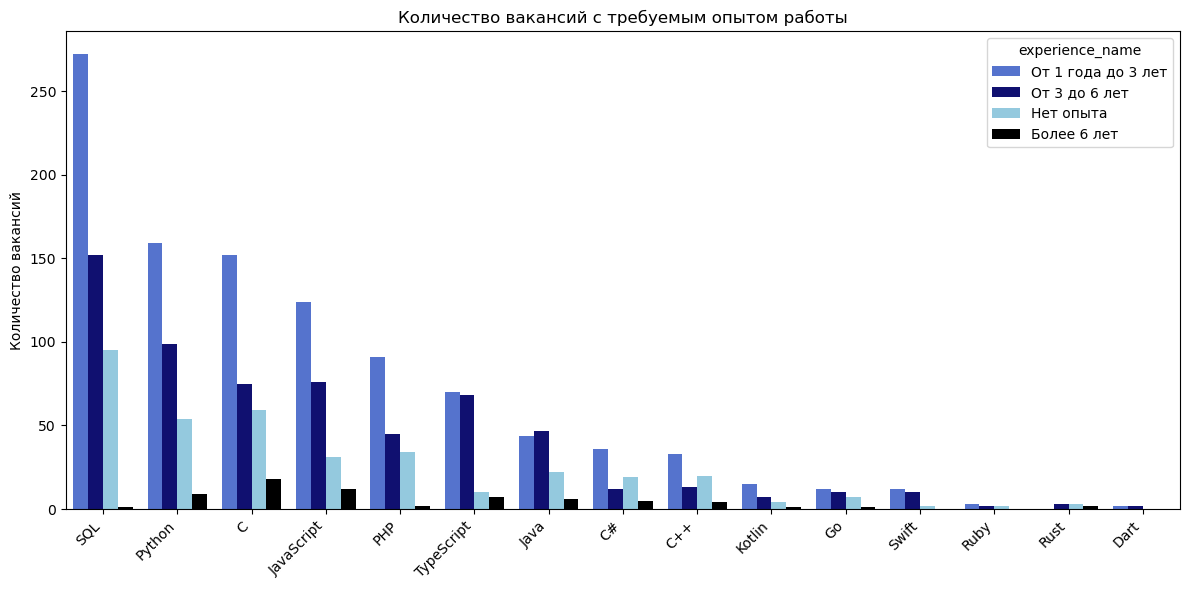

In [529]:
def get_data(conn_params):
    conn, cur = connect_to_db(conn_params)
    if conn is None:
        return None

    query = """
      SELECT l.language_name, v.experience_name, COUNT(v.id) AS vacancy_count
FROM vacancies v
JOIN languages l ON (v.vac_name ~* CASE WHEN l.language_name = 'C++' THEN 'C\+\+' WHEN l.language_name = 'C#' THEN 'C\#' ELSE format('(^|\y)%s($|\y)', regexp_replace(l.language_name, '([$.*+?()[\]{}\|\^])', '\\\\\1', 'g')) END)
OR (v.snippet_req ~* CASE WHEN l.language_name = 'C++' THEN 'C\+\+' WHEN l.language_name = 'C#' THEN 'C\#' ELSE format('(^|\y)%s($|\y)', regexp_replace(l.language_name, '([$.*+?()[\]{}\|\^])', '\\\\\1', 'g')) END)
GROUP BY l.language_name, v.experience_name
ORDER BY vacancy_count DESC, l.language_name ;
    """

    df = execute_query(cur, query)
    close_connection(conn, cur)
    return df

df = get_data(conn_params)
if df is not None:
    #print(df)
    plt.figure(figsize=(12, 6))  

    palette = {
           "От 1 года до 3 лет": "royalblue",  
           "От 3 до 6 лет": "navy",
           "Нет опыта": "skyblue",
           "Более 6 лет": "black"
        }
    
    sns.barplot(x='language_name', y='vacancy_count', hue='experience_name',data=df, palette=palette)
    plt.xticks(rotation=45, ha='right') 
    plt.xlabel('')
    plt.ylabel('Количество вакансий')
    plt.title('Количество вакансий c требуемым опытом работы')
    plt.tight_layout()  
    plt.show()

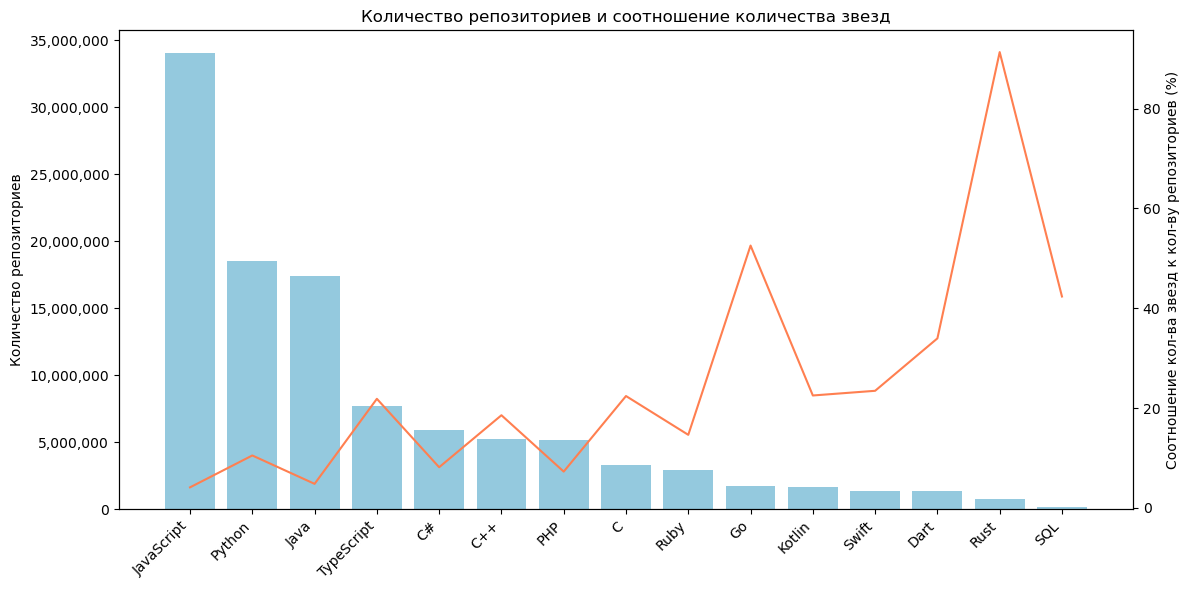

In [399]:
import matplotlib as mat

def get_data(conn_params):
    conn, cur = connect_to_db(conn_params)
    if conn is None:
        return None

    query = """
     SELECT language_name, repos, stars
        FROM repos_counter
        ORDER BY repos DESC;
    """

    df = execute_query(cur, query)
    close_connection(conn, cur)
    return df

df = get_data(conn_params)

if df is not None:
    #print(df)
    df['star_repo_ratio'] = (df['stars'] / df['repos']) * 100
        
    fig, ax1 = plt.subplots(figsize=(12, 6))

    sns.barplot(x='language_name', y='repos', data=df, ax=ax1, color='skyblue')
    ax1.set_xlabel('')
    ax1.set_ylabel('Количество репозиториев')
    ax1.tick_params(axis='y')
    plt.xticks(rotation=45, ha='right')  
    ax1.set_title('Количество репозиториев и соотношение количества звезд')


    ax2 = ax1.twinx() 
    sns.lineplot(x='language_name', y='star_repo_ratio', data=df, ax=ax2, color='coral')
    ax2.set_ylabel('Соотношение кол-ва звезд к кол-ву репозиториев (%)')
    ax2.tick_params(axis='y')
    
    def format_func(value, tick_number):
            return f"{int(value):,}"

    ax1.yaxis.set_major_formatter(mat.ticker.FuncFormatter(format_func))
    
    fig.tight_layout()
    plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\+'
<>:10: SyntaxWarning: invalid escape sequence '\+'
C:\Users\Данила\AppData\Local\Temp\ipykernel_18536\891191837.py:10: SyntaxWarning: invalid escape sequence '\+'
  query = """


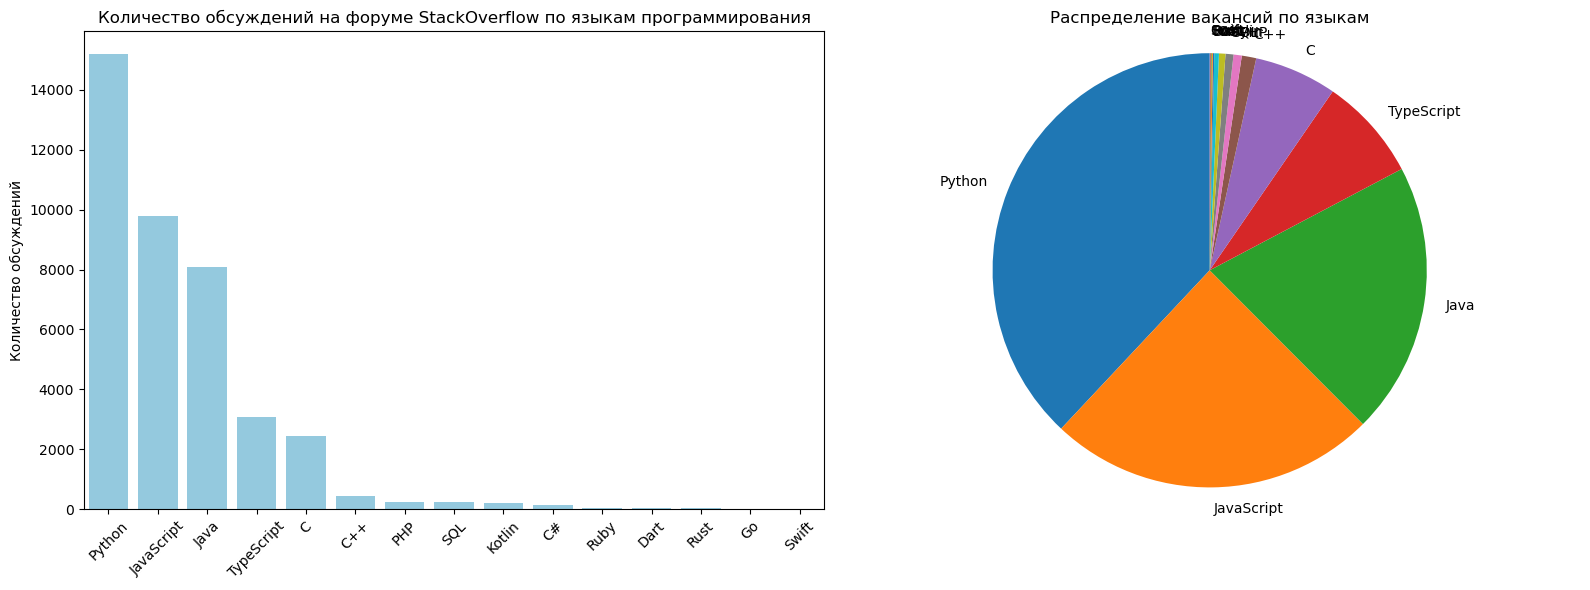

In [491]:
def get_data(conn_params):
    conn, cur = connect_to_db(conn_params)
    if conn is None:
        return None

    query = """
        SELECT l.language_name, COUNT(f.id) AS topics_count
FROM languages l
JOIN forum_discussions f ON (f.tags ~* CASE WHEN l.language_name = 'C++' THEN 'C\+\+' WHEN l.language_name = 'C#' THEN 'C\#' ELSE format('(^|\y)%s($|\y)', regexp_replace(l.language_name, '([$.*+?()[\]{}\|\^])', '\\\\\1', 'g')) END)    
GROUP BY l.language_name
ORDER BY topics_count DESC;
    """

    df = execute_query(cur, query)
    close_connection(conn, cur)
    return df

df = get_data(conn_params)
if df is not None:
    #print(df)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6)) 


    sns.barplot(x='language_name', y='topics_count', data=df, color='skyblue', ax=ax1)
    ax1.tick_params(axis='x', rotation=45)  
    ax1.set_xlabel('')
    ax1.set_ylabel('Количество обсуждений')
    ax1.set_title('Количество обсуждений на форуме StackOverflow по языкам программирования')

    ax2.pie(df['topics_count'], labels=df['language_name'], startangle=90)
    ax2.axis('equal') 
    ax2.set_title('Распределение вакансий по языкам')

    plt.tight_layout()
    plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\+'
<>:10: SyntaxWarning: invalid escape sequence '\+'
C:\Users\Данила\AppData\Local\Temp\ipykernel_18536\550827573.py:10: SyntaxWarning: invalid escape sequence '\+'
  query = """


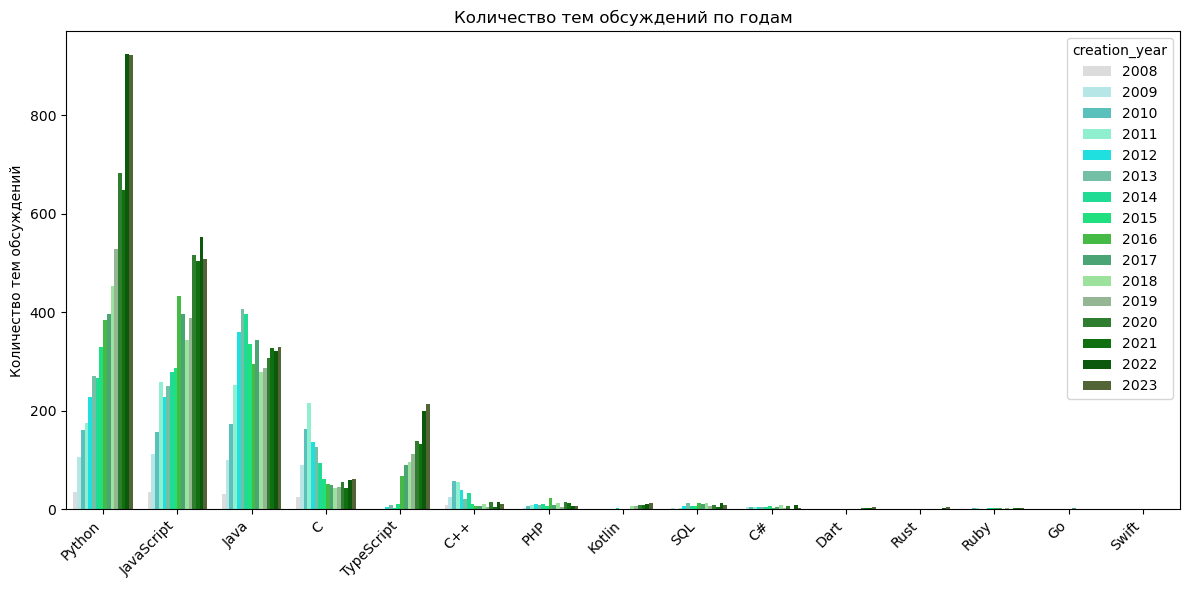

In [459]:
def get_data(conn_params):
    conn, cur = connect_to_db(conn_params)
    if conn is None:
        return None

    query = """
     SELECT l.language_name, EXTRACT (YEAR FROM creation_date) AS creation_year, COUNT(*) AS topics_count
FROM languages l
JOIN forum_discussions f ON (f.tags ~* CASE WHEN l.language_name = 'C++' THEN 'C\+\+' WHEN l.language_name = 'C#' THEN 'C\#' WHEN l.language_name = 'C' THEN format('(^|\y)%s($|\y)', 'C') ELSE format('(^|\y)%s($|\y)', regexp_replace(l.language_name, '([$.*+?()[\]{}\|\^])', '\\\\\1', 'g')) END)    
WHERE EXTRACT (YEAR FROM creation_date) < 2024
GROUP BY l.language_name, creation_year
ORDER BY topics_count DESC, creation_year DESC;
    """

    df = execute_query(cur, query)
    close_connection(conn, cur)
    return df

df = get_data(conn_params)
if df is not None:
    #print(df)
    plt.figure(figsize=(12, 6))  

    palette = {
        2008 : "gainsboro",
        2009 : "paleturquoise",
           2010 : "mediumturquoise",
        2011 : "aquamarine",
        2012 : "cyan",
    2013 : "mediumaquamarine",
    2014 : "mediumspringgreen",
    2015 : "springgreen",
    2016 : "limegreen",
    2017 : "mediumseagreen",
    2018 : "lightgreen",
    2019 : "darkseagreen",
    2020 : "forestgreen",
    2021 : "green",
    2022 : "darkgreen",
    2023 : "darkolivegreen"
        }
    
    sns.barplot(x='language_name', y='topics_count', hue='creation_year',data=df, palette=palette)
    plt.xticks(rotation=45, ha='right') 
    plt.xlabel('')
    plt.ylabel('Количество тем обсуждений')
    plt.title('Количество тем обсуждений по годам')
    plt.tight_layout()  
    plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\+'
<>:10: SyntaxWarning: invalid escape sequence '\+'
C:\Users\Данила\AppData\Local\Temp\ipykernel_18536\1470181627.py:10: SyntaxWarning: invalid escape sequence '\+'
  query = """


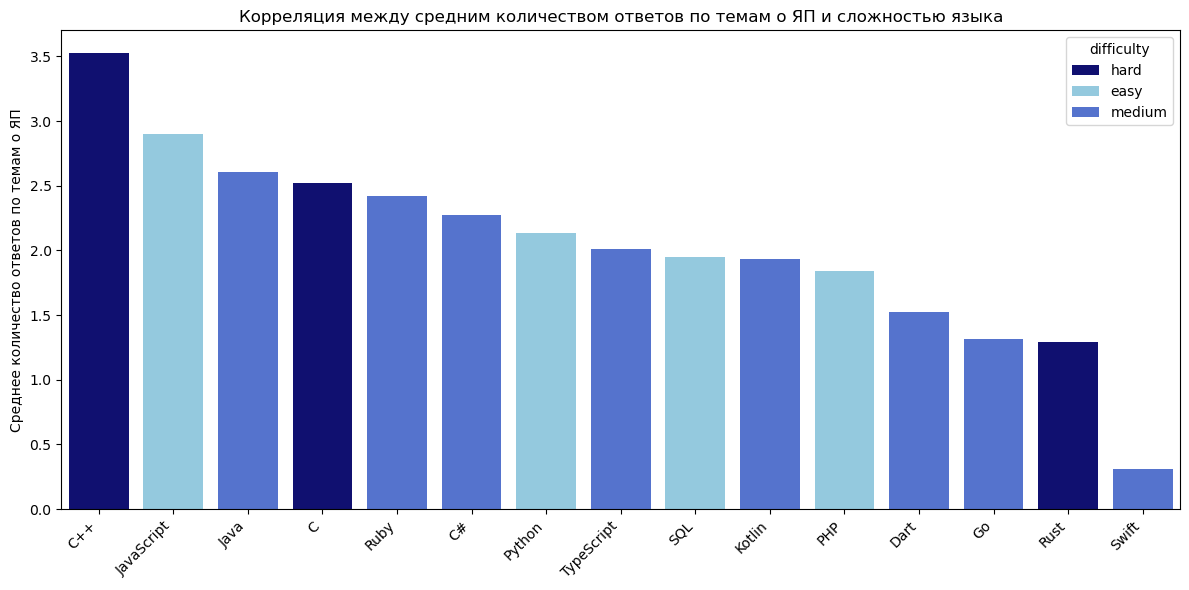

In [471]:
def get_data(conn_params):
    conn, cur = connect_to_db(conn_params)
    if conn is None:
        return None

    query = """
        SELECT l.language_name, l.difficulty, CAST(SUM(f.answer_count) AS FLOAT)/COUNT(f.id) AS avg_answers_for_topic
FROM languages l
JOIN forum_discussions f ON (f.tags ~* CASE WHEN l.language_name = 'C++' THEN 'C\+\+' WHEN l.language_name = 'C#' THEN 'C\#' ELSE format('(^|\y)%s($|\y)', regexp_replace(l.language_name, '([$.*+?()[\]{}\|\^])', '\\\\\1', 'g')) END)    
GROUP BY l.language_name, l.difficulty
ORDER BY avg_answers_for_topic DESC;
    """

    df = execute_query(cur, query)
    close_connection(conn, cur)
    return df

df = get_data(conn_params)
if df is not None:
    #print(df)
    plt.figure(figsize=(12, 6))  
    palette = {
           "easy": "skyblue",  
           "medium": "royalblue",
           "hard": "navy"
        }
    sns.barplot(x='language_name', y='avg_answers_for_topic', hue='difficulty', data=df, color='skyblue', palette = palette)
    plt.xticks(rotation=45, ha='right') 
    plt.xlabel('')
    plt.ylabel('Среднее количество ответов по темам о ЯП')
    plt.title('Корреляция между средним количеством ответов по темам о ЯП и сложностью языка')
    plt.tight_layout() 
    plt.show()

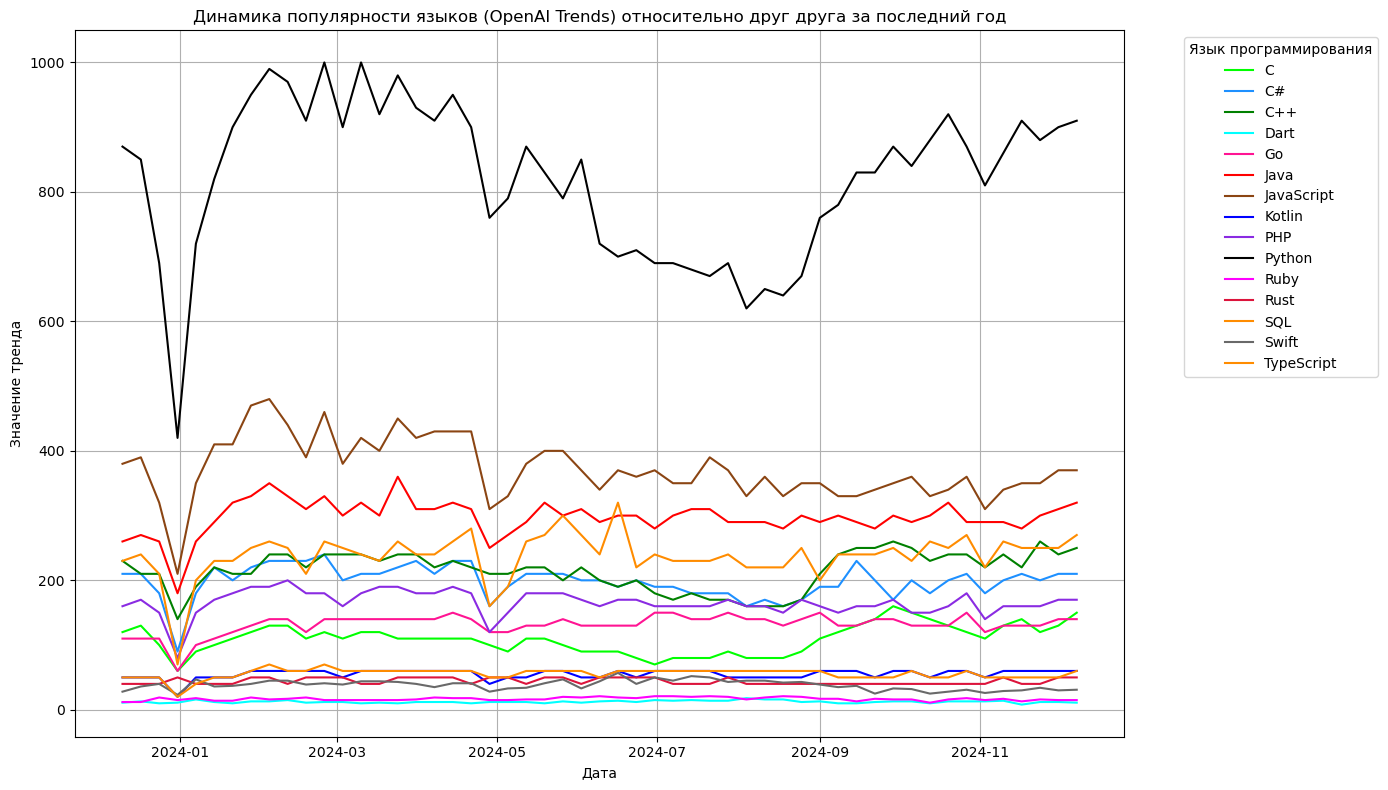

In [515]:
def get_data(conn_params):
    conn, cur = connect_to_db(conn_params)
    if conn is None:
        return None

    query = """
       SELECT language_name,date,trend_value
FROM trends
ORDER BY language_name, date;
    """

    df = execute_query(cur, query)
    close_connection(conn, cur)
    return df

df = get_data(conn_params)

if df is not None:
      plt.figure(figsize=(14, 8))
      palette = {
          'Java' : "red", 
          'TypeScript' : "darkorange", 
          'JavaScript' : "saddlebrown", 
          'Python' : "black", 
          'C' : "lime", 
          'C#' : "dodgerblue", 
          'C++' : "green", 
          'Go' : "deeppink", 
          'PHP' : "blueviolet", 
          'Swift' : "dimgrey", 
          'SQL' : "darkorange", 
          'Ruby' : "fuchsia", 
          'Kotlin' : "blue", 
          'Dart' : "aqua", 
          'Rust' : "crimson"
      }
      sns.lineplot(data=df, x='date', y='trend_value', hue='language_name', palette=palette)
      plt.title("Динамика популярности языков (OpenAI Trends) относительно друг друга за последний год")
      plt.xlabel("Дата")
      plt.ylabel("Значение тренда")
      plt.legend(title="Язык программирования", bbox_to_anchor=(1.05, 1), loc='upper left')
      plt.grid(True)
      plt.tight_layout()
      plt.show()

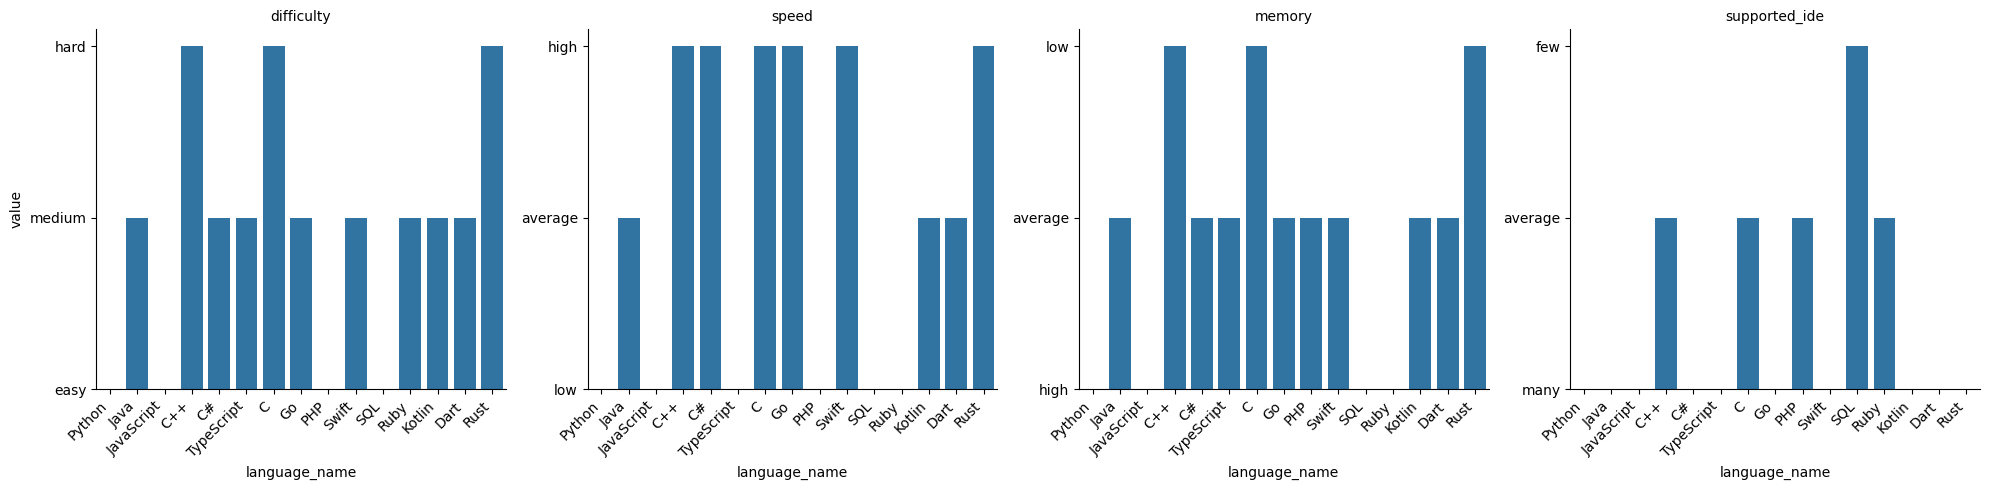

In [521]:
def get_data(conn_params):

    conn, cur = connect_to_db(conn_params)
    if conn is None:
        return None

    query = """
      SELECT language_name,difficulty,supported_ide,speed,memory
FROM languages;
    """

    df = execute_query(cur, query)
    close_connection(conn, cur)
    return df

df = get_data(conn_params)

if df is not None:
    #print(df)

    metrics = ["difficulty", "speed", "memory","supported_ide"]

    df_melted = pd.melt(df, id_vars=['language_name'], value_vars=metrics, var_name='metric', value_name='value')
    
    g = sns.FacetGrid(df_melted, col='metric', col_wrap=4, sharey=False, height=5)
    g.map(sns.barplot, 'language_name', 'value', order = df['language_name'].tolist())
    g.set_titles("{col_name}")
    g.set_xticklabels(rotation=45, ha='right')
    
    for ax in g.axes.flat:
        ax.get_figure().subplots_adjust(wspace=0.4, hspace=1)
        ax.invert_yaxis()
    
    
    g.tight_layout()
    plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\+'
<>:6: SyntaxWarning: invalid escape sequence '\+'
C:\Users\Данила\AppData\Local\Temp\ipykernel_18536\875755439.py:6: SyntaxWarning: invalid escape sequence '\+'
  query = """


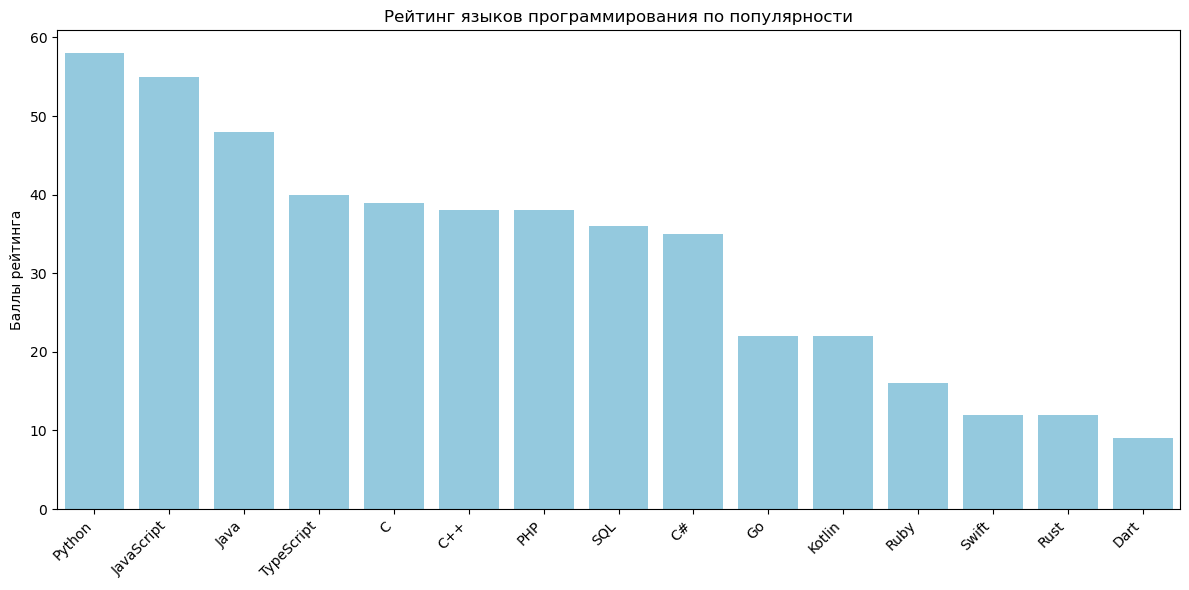

In [535]:
def get_data(conn_params):
    conn, cur = connect_to_db(conn_params)
    if conn is None:
        return None

    query = """
        WITH VacancyCounts AS (SELECT l.language_name, COUNT(v.id) AS vacancy_count FROM languages l
 	JOIN vacancies v ON (v.vac_name ~* CASE WHEN l.language_name = 'C++' THEN 'C\+\+' WHEN l.language_name = 'C#' THEN 'C\#' ELSE format('(^|\y)%s($|\y)', regexp_replace(l.language_name, '([$.*+?()[\]{}\|\^])', '\\\\\1', 'g')) END)
    OR (v.snippet_req ~* CASE WHEN l.language_name = 'C++' THEN 'C\+\+' WHEN l.language_name = 'C#' THEN 'C\#' ELSE format('(^|\y)%s($|\y)', regexp_replace(l.language_name, '([$.*+?()[\]{}\|\^])', '\\\\\1', 'g')) END)
    GROUP BY l.language_name),
RepoCounts AS (SELECT language_name,repos AS repo_count FROM repos_counter),
ForumCounts AS (SELECT l.language_name, COUNT(f.id) AS forum_count FROM languages l
    JOIN forum_discussions f ON (f.tags ~* CASE WHEN l.language_name = 'C++' THEN 'C\+\+' WHEN l.language_name = 'C#' THEN 'C\#' ELSE format('(^|\y)%s($|\y)', regexp_replace(l.language_name, '([$.*+?()[\]{}\|\^])', '\\\\\1', 'g')) END)
    GROUP BY l.language_name),
TrendSums AS (SELECT language_name, SUM(trend_value) AS total_trend_value FROM trends GROUP BY language_name),
RankedData AS (SELECT vc.language_name,vc.vacancy_count,rc.repo_count,fc.forum_count,ts.total_trend_value,
    RANK() OVER (ORDER BY vc.vacancy_count DESC) AS vacancy_rank, RANK() OVER (ORDER BY rc.repo_count DESC) AS repo_rank,
    RANK() OVER (ORDER BY fc.forum_count DESC) AS forum_rank, RANK() OVER (ORDER BY ts.total_trend_value DESC) AS trend_rank
    FROM VacancyCounts vc
    JOIN RepoCounts rc ON vc.language_name = rc.language_name
	JOIN ForumCounts fc ON vc.language_name = fc.language_name
    JOIN TrendSums ts ON vc.language_name = ts.language_name),
ScoredData AS (SELECT language_name,vacancy_count,repo_count,forum_count,total_trend_value,
	CASE WHEN vacancy_rank <= 15 THEN 16 - vacancy_rank ELSE 0 END +
    CASE WHEN repo_rank <= 15 THEN 16 - repo_rank ELSE 0 END +
	CASE WHEN forum_rank <= 15 THEN 16 - forum_rank ELSE 0 END +
	CASE WHEN trend_rank <= 15 THEN 16 - trend_rank ELSE 0 END AS total_score
    FROM RankedData)
SELECT language_name, total_score
FROM ScoredData
ORDER BY total_score DESC;

    """

    df = execute_query(cur, query)
    close_connection(conn, cur)
    return df

df = get_data(conn_params)
if df is not None:
    plt.figure(figsize=(12, 6))  # Увеличиваем размер графика
    sns.barplot(x='language_name', y='total_score', data=df, color='skyblue')
    plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи на оси X
    plt.xlabel('')
    plt.ylabel('Баллы рейтинга')
    plt.title('Рейтинг языков программирования по популярности')
    plt.tight_layout()  # Убираем обрезку подписей
    plt.show() 